# SAMD9L
[ataxia-pancytopenia syndrome (ATXPC)](https://omim.org/entry/159550) is caused by heterozygous mutation in the SAMD9L gene. 

In [2]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1


# SAMD9L
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SAMD9L.

In [3]:
gene_symbol = 'SAMD9L'
mane_tx_id = 'NM_152703.5'
mane_protein_id = 'NP_689916.2' # sterile alpha motif domain-containing protein 9-like

### Phenopackets
We loaded a cohort of 22 phenopackets representing published descriptions of individuals with pathogenic variants in ASPM diagnosed with MCPH5.
TODO UPDATE

In [9]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.21'
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

#cohort, qc = load_phenopackets(
#    phenopackets=phenopackets, 
#    cohort_creator=cohort_creator,
#)
#print(f'Loaded {len(cohort)} individuals')
#qc.summarize()

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder

ppdir = "../../../phenopacket-store/notebooks/SAMD9L/phenopackets"
cohort, qc = load_phenopacket_folder(
    ppdir,cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Individuals Processed: 31individuals [00:02, 11.04individuals/s]
Loaded 31 individuals
Validated under permissive policy
No errors or warnings were found


In [10]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Thrombocytopenia,HP:0001873,19
Neutropenia,HP:0001875,16
Unsteady gait,HP:0002317,16
Pancytopenia,HP:0001876,12
Myelodysplasia,HP:0002863,12
Anemia,HP:0001903,10
Cerebellar atrophy,HP:0001272,10
Hyperreflexia,HP:0001347,9
Ataxia,HP:0001251,9
Gaze-evoked horizontal nystagmus,HP:0007979,9


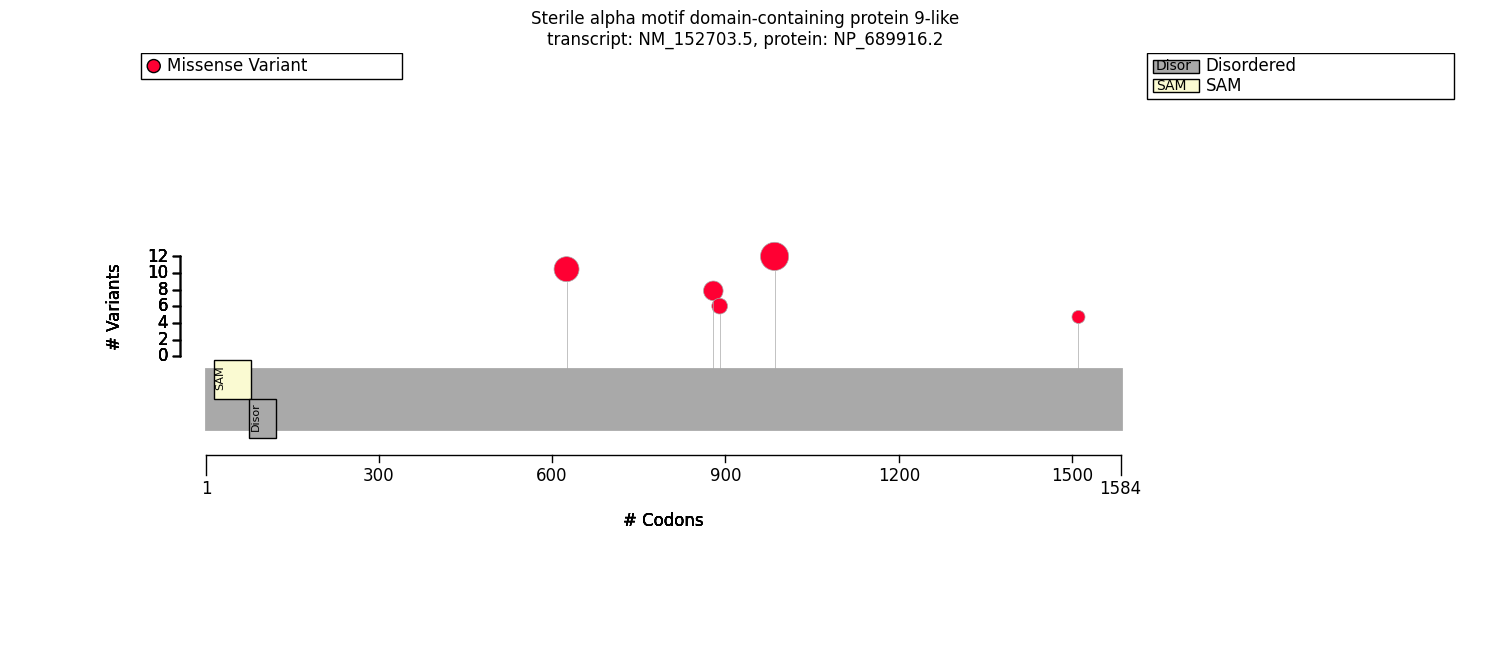

In [11]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

samd9l_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
samd9l_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [12]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [13]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

n_term = VariantPredicates.region(region=Region(0, 950), tx_id=mane_tx_id)
nterm_predicate = monoallelic_predicate(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="N Term",
    b_label="other")
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=nterm_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(nterm_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,5
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,51
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,74


In [14]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                 N Term  ...          
                                              Count  ...  p values
Neutropenia [HP:0001875]                       6/15  ...  0.047328
Thrombocytopenia [HP:0001873]                  8/17  ...  0.057457
Pancytopenia [HP:0001876]                      5/14  ...  0.089379
Ankle clonus [HP:0011448]                      4/14  ...  0.125000
Dysarthria [HP:0001260]                        7/15  ...  0.485294
Anemia [HP:0001903]                            5/14  ...  0.696830
Abnormal platelet count [HP:0011873]            8/8  ...  1.000000
Abnormal neutrophil count [HP:0011991]          6/6  ...  1.000000
Abnormal granulocyte morphology [HP:0001911]    6/6  ...  1.000000
Hyperreflexia [HP:0001347]                    13/13  ...  1.000000
Abnormal reflex [HP:0031826]                  13/13  ...  1.000000
Unsteady gait [HP:0002317]                    12/14  ...  1.000000
Gait disturbance [HP:0001288]                 12/12  ...  1.000000
Ataxia [HP:0001251]                           13/13  ...  1.000000
Nystagmus [HP:0000639]                        14/14  ...  1.000000

[15 rows x 6 columns]

In [15]:
arg986cys = VariantPredicates.variant_key("7_93133016_93133016_G_A") # c.2956C>T	p.Arg986Cys	
arg986cys_predicate = monoallelic_predicate(
    a_predicate=arg986cys,
    b_predicate=~arg986cys,
    a_label="N Term",
    b_label="other")
arg986cys_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=arg986cys_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group                                 N Term  ...          
                                              Count  ...  p values
Neutropenia [HP:0001875]                       6/15  ...  0.047328
Thrombocytopenia [HP:0001873]                  8/17  ...  0.057457
Pancytopenia [HP:0001876]                      5/14  ...  0.089379
Ankle clonus [HP:0011448]                      4/14  ...  0.125000
Dysarthria [HP:0001260]                        7/15  ...  0.485294
Anemia [HP:0001903]                            5/14  ...  0.696830
Abnormal platelet count [HP:0011873]            8/8  ...  1.000000
Abnormal neutrophil count [HP:0011991]          6/6  ...  1.000000
Abnormal granulocyte morphology [HP:0001911]    6/6  ...  1.000000
Hyperreflexia [HP:0001347]                    13/13  ...  1.000000
Abnormal reflex [HP:0031826]                  13/13  ...  1.000000
Unsteady gait [HP:0002317]                    12/14  ...  1.000000
Gait disturbance [HP:0001288]                 12/12  ...  1.000000
Ataxia [HP:0001251]                           13/13  ...  1.000000
Nystagmus [HP:0000639]                        14/14  ...  1.000000

[15 rows x 6 columns]